In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.utils.multiclass import unique_labels
import seaborn as sns

In [3]:
df=pd.read_csv("F:/PROJECT/MINI PROJ 3/Crime_Data1.csv")

In [4]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,25-08-07 9:22,074XX N ROGERS AVE,560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,17-08-15 15:03,NaN,NaN,NaN
1,25953,JE240540,24-05-21 15:06,020XX N LARAMIE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,18-11-23 15:39,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,26-06-21 9:24,062XX N MC CORMICK RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,18-11-23 15:39,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,09-11-23 7:30,019XX W BYRON ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,5,1162518.0,1925906.0,2023,18-11-23 15:39,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,12-11-23 7:59,086XX S COTTAGE GROVE AVE,454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,09-12-23 15:41,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549999 entries, 0 to 549998
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    549999 non-null  int64  
 1   Case Number           549999 non-null  object 
 2   Date                  549999 non-null  object 
 3   Block                 549999 non-null  object 
 4   IUCR                  549999 non-null  object 
 5   Primary Type          549999 non-null  object 
 6   Description           549999 non-null  object 
 7   Location Description  548326 non-null  object 
 8   Arrest                549999 non-null  bool   
 9   Domestic              549999 non-null  bool   
 10  Beat                  549999 non-null  int64  
 11  District              549999 non-null  int64  
 12  Ward                  213674 non-null  float64
 13  Community Area        215093 non-null  float64
 14  FBI Code              549999 non-null  object 
 15  

In [6]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1673
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    336325
Community Area          334906
FBI Code                     0
X Coordinate              6912
Y Coordinate              6912
Year                         0
Updated On                   0
Latitude                  6912
Longitude                 6912
Location                  6912
dtype: int64

In [7]:
columns_to_fill = ['Location Description', 'Ward', 'Community Area', 'X Coordinate', 
                   'Y Coordinate', 'Latitude', 'Longitude', 'Location']
for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mode()[0])

In [8]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,25-08-07 9:22,074XX N ROGERS AVE,560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,1100635.0,1934208.0,2007,17-08-15 15:03,41.976200,-87.905312,"(41.976200173, -87.905312411)"
1,25953,JE240540,24-05-21 15:06,020XX N LARAMIE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,18-11-23 15:39,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,26-06-21 9:24,062XX N MC CORMICK RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,18-11-23 15:39,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,09-11-23 7:30,019XX W BYRON ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,5,1162518.0,1925906.0,2023,18-11-23 15:39,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,12-11-23 7:59,086XX S COTTAGE GROVE AVE,454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,09-12-23 15:41,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [8]:
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
549994,1715153,G516233,27-08-01 23:00,036XX S LAKE PARK AV,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,RESIDENCE,False,True,...,27.0,25.0,26,1182305.0,1881212.0,2001,17-08-15 15:03,41.829265,-87.606630,"(41.829264761, -87.606629868)"
549995,1799889,G625392,16-10-01 16:30,065XX S STEWART AV,610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,...,27.0,25.0,5,1174713.0,1861451.0,2001,17-08-15 15:03,41.775211,-87.635073,"(41.775211478, -87.635073388)"
549996,1769834,G583569,29-09-01 5:35,031XX N CENTRAL PARK AV,460,BATTERY,SIMPLE,RESIDENCE,False,True,...,27.0,25.0,08B,1151878.0,1920763.0,2001,17-08-15 15:03,41.938449,-87.717224,"(41.938448908, -87.717224032)"
549997,1788327,G610965,12-09-01 9:05,065XX S CICERO AV,910,MOTOR VEHICLE THEFT,AUTOMOBILE,OTHER,True,False,...,27.0,25.0,7,1145544.0,1861043.0,2001,17-08-15 15:03,41.774692,-87.742015,"(41.774692006, -87.742014699)"
549998,1810693,G627247,18-10-01 17:34,053XX W FERDINAND ST,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,False,...,27.0,25.0,26,1140670.0,1902673.0,2001,17-08-15 15:03,41.889022,-87.758862,"(41.889021585, -87.758861788)"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549999 entries, 0 to 549998
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    549999 non-null  int64  
 1   Case Number           549999 non-null  object 
 2   Date                  549999 non-null  object 
 3   Block                 549999 non-null  object 
 4   IUCR                  549999 non-null  object 
 5   Primary Type          549999 non-null  object 
 6   Description           549999 non-null  object 
 7   Location Description  549999 non-null  object 
 8   Arrest                549999 non-null  bool   
 9   Domestic              549999 non-null  bool   
 10  Beat                  549999 non-null  int64  
 11  District              549999 non-null  int64  
 12  Ward                  549999 non-null  float64
 13  Community Area        549999 non-null  float64
 14  FBI Code              549999 non-null  object 
 15  

In [11]:
# After cleaning the DataFrame 
df.to_csv('F:/PROJECT/MINI PROJ 3/cleaned_data.csv', index=False)


In [10]:
df['Primary Type'].value_counts()

Primary Type
THEFT                                112771
BATTERY                              101006
CRIMINAL DAMAGE                       60216
ASSAULT                               40050
NARCOTICS                             39571
MOTOR VEHICLE THEFT                   37215
OTHER OFFENSE                         33893
DECEPTIVE PRACTICE                    24225
BURGLARY                              23381
ROBBERY                               21069
HOMICIDE                              13152
CRIMINAL TRESPASS                     12844
WEAPONS VIOLATION                      8664
PROSTITUTION                           4315
OFFENSE INVOLVING CHILDREN             3559
SEX OFFENSE                            2855
PUBLIC PEACE VIOLATION                 2594
CRIMINAL SEXUAL ASSAULT                1673
LIQUOR LAW VIOLATION                   1341
CRIM SEXUAL ASSAULT                    1219
ARSON                                  1156
INTERFERENCE WITH PUBLIC OFFICER        745
KIDNAPPING         

**Crime Trends Over Time**

*CONVERT DATETIME FORMAT*

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y %H:%M')


In [13]:
df['Date'].head()

0   2007-08-25 09:22:00
1   2021-05-24 15:06:00
2   2021-06-26 09:24:00
3   2023-11-09 07:30:00
4   2023-11-12 07:59:00
Name: Date, dtype: datetime64[ns]

In [14]:
df['Year'] =  df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour

**MODEL CREATION**

In [15]:
# Create dataset for model
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df1 = df.groupby(['Month', 'Day', 'District', 'Hour'], as_index=False).agg({"Primary Type": "count"})
df1 = df1.sort_values(by=['District'], ascending=False)
df1 = df1[['Month', 'Day', 'Hour', 'Primary Type', 'District']]

def crime_rate_assign(x):
    if x <= 7:
        return 0
    elif 7 < x <= 15:
        return 1
    else:
        return 2

df1['Alarm'] = df1['Primary Type'].apply(crime_rate_assign)
df1 = df1[['Month', 'Day', 'Hour', 'District', 'Primary Type', 'Alarm']]
print(df1.head())

        Month  Day  Hour  District  Primary Type  Alarm
8179        1   17    20        31             2      0
141708     11    1     9        31             1      0
146435     11   13    17        31             1      0
144558     11    8    13        31             1      0
128298     10    3    10        31             1      0


In [16]:
X = df1[['Month', 'Day', 'Hour', 'District']]
y = df1['Alarm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
d_tree = DecisionTreeClassifier(random_state=10)

Support Vector Classifier Accuracy: 94.27%



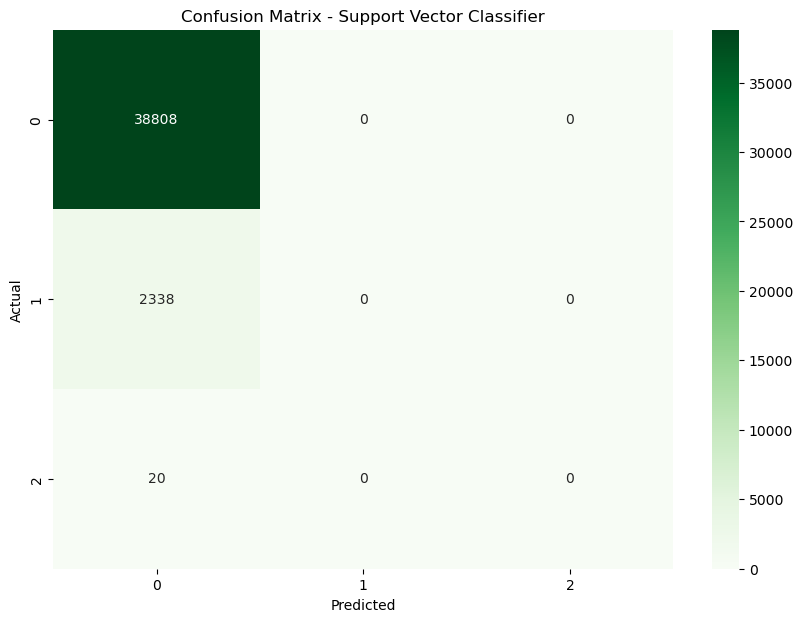


---------- Support Vector Classifier Classification Report ----------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38808
           1       0.00      0.00      0.00      2338
           2       0.00      0.00      0.00        20

    accuracy                           0.94     41166
   macro avg       0.31      0.33      0.32     41166
weighted avg       0.89      0.94      0.91     41166


Support Vector Classifier Unweighted Average Recall (UAR): 0.33


f:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# Support Vector Classifier
svc_model = SVC(kernel='linear', random_state=1)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# Model Evaluation for SVC
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Support Vector Classifier Accuracy: {accuracy_svc * 100:.2f}%\n")

# Confusion Matrix for SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_svc_df = pd.DataFrame(cm_svc, index=unique_labels(y_test, y_pred_svc), columns=unique_labels(y_test, y_pred_svc))
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svc_df, annot=True, fmt='d', cmap='Greens')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Support Vector Classifier')
plt.show()

# Classification Report for SVC
print("\n---------- Support Vector Classifier Classification Report ----------")
print(classification_report(y_test, y_pred_svc))

# Unweighted Average Recall (UAR) for SVC
recall_per_class_svc = recall_score(y_test, y_pred_svc, average=None)
uar_svc = recall_per_class_svc.mean()
print(f"\nSupport Vector Classifier Unweighted Average Recall (UAR): {uar_svc:.2f}")